In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [45]:
# Read u.data as df_ratings
ratings_cols=['user_id','movie_id','rating','timestamp']
df_ratings=pd.read_csv('ml-100K/u.data',sep='\t', names=ratings_cols)

In [46]:
# Read u.item as df_movies
movies_cols = ['movie_id', 'title', 'release_date', 'video_release_date', 'imdb_url']
df_movies = pd.read_csv('ml-100k/u.item', sep='|', encoding='latin-1', usecols=range(5), names=movies_cols)

In [47]:
# Read u.user as df_users
user_columns = ['user_id', 'age', 'gender', 'occupation', 'zip_code']
df_users = pd.read_csv('ml-100k/u.user', sep='|', names=user_columns)

In [48]:
print(df_ratings.info()) # summary of the dataframe
print('')
print(df_movies.info())
print('')
print(df_users.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user_id    100000 non-null  int64
 1   movie_id   100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movie_id            1682 non-null   int64  
 1   title               1682 non-null   object 
 2   release_date        1681 non-null   object 
 3   video_release_date  0 non-null      float64
 4   imdb_url            1679 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 65.8+ KB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 c

In [49]:
print(df_ratings.describe()) # .describe() gives statistics about data
print('')
print(df_movies.describe())
print('')
print(df_users.describe())

            user_id       movie_id         rating     timestamp
count  100000.00000  100000.000000  100000.000000  1.000000e+05
mean      462.48475     425.530130       3.529860  8.835289e+08
std       266.61442     330.798356       1.125674  5.343856e+06
min         1.00000       1.000000       1.000000  8.747247e+08
25%       254.00000     175.000000       3.000000  8.794487e+08
50%       447.00000     322.000000       4.000000  8.828269e+08
75%       682.00000     631.000000       4.000000  8.882600e+08
max       943.00000    1682.000000       5.000000  8.932866e+08

          movie_id  video_release_date
count  1682.000000                 0.0
mean    841.500000                 NaN
std     485.695893                 NaN
min       1.000000                 NaN
25%     421.250000                 NaN
50%     841.500000                 NaN
75%    1261.750000                 NaN
max    1682.000000                 NaN

          user_id         age
count  943.000000  943.000000
mean   472.

In [149]:
print(df_ratings.head()) # .head() by default gives first 5 rows. Can be adjusted
print('')
print(df_movies.head())
print('')
print(df_users.head())

   user_id  movie_id  rating  timestamp
0      196       242       3  881250949
1      186       302       3  891717742
2       22       377       1  878887116
3      244        51       2  880606923
4      166       346       1  886397596

   movie_id              title release_date  video_release_date  \
0         1   Toy Story (1995)  01-Jan-1995                 NaN   
1         2   GoldenEye (1995)  01-Jan-1995                 NaN   
2         3  Four Rooms (1995)  01-Jan-1995                 NaN   
3         4  Get Shorty (1995)  01-Jan-1995                 NaN   
4         5     Copycat (1995)  01-Jan-1995                 NaN   

                                            imdb_url  
0  http://us.imdb.com/M/title-exact?Toy%20Story%2...  
1  http://us.imdb.com/M/title-exact?GoldenEye%20(...  
2  http://us.imdb.com/M/title-exact?Four%20Rooms%...  
3  http://us.imdb.com/M/title-exact?Get%20Shorty%...  
4  http://us.imdb.com/M/title-exact?Copycat%20(1995)  

   user_id  age gender  o

In [153]:
print(f"Ratings: {df_ratings.shape[0]} rows.") # shape[0] for rows. shape[1] for columns.
print('')
print(f"Movies: {df_movies.shape[0]} rows.")
print('')
print(f"Users: {df_users.shape[0]} rows.")

Ratings: 100000 rows.

Movies: 1682 rows.

Users: 943 rows.


In [145]:
import numpy as np
import pandas as pd
uniqueRating = df_ratings['rating'].nunique() # number of unique values. 
print("number of unique values in the 'rating' column:", uniqueRating)
print(np.unique(df_ratings['rating'])) # The unique values

number of unique values in the 'rating' column: 5
[1 2 3 4 5]


In [53]:
uniqueUserid = df_ratings['user_id'].nunique()
print(f"There are {uniqueUserid} unique values in the column 'user_id'")
print('')
#print(np.unique(df_ratings['user_id']))

# What does this number represent?
# There are 943 unique individual users who rated the movies. As in, the total amount of people used for this data is 943.

There are 943 unique values in the column 'user_id'



rating
1     6110
2    11370
3    27145
4    34174
5    21201
Name: count, dtype: int64


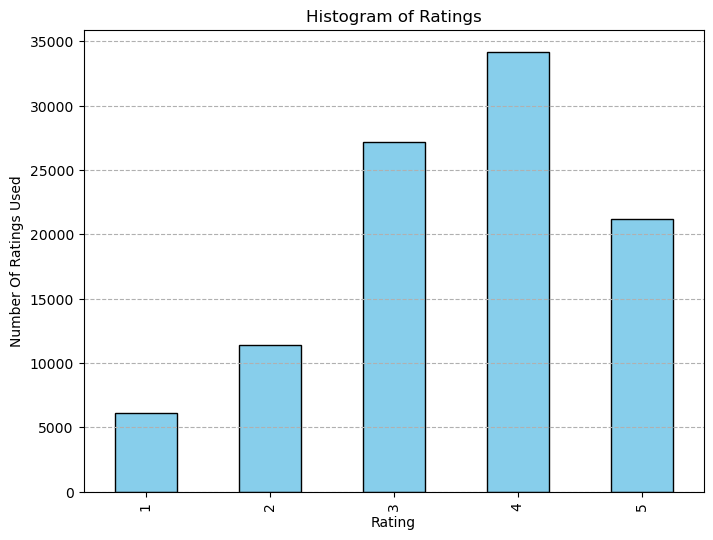

In [165]:
ratingCount = df_ratings['rating'].value_counts().sort_index() # value_counts to count unique values in a column. Sort_index to sort them numerically instead of by number of occurences
print(ratingCount)
# Plot the histogram
plt.figure(figsize=(8,6))
ratingCount.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Histogram of Ratings')
plt.xlabel('Rating')
plt.ylabel('Number Of Ratings Used')
plt.grid(axis='y', linestyle='--')
plt.show()

In [55]:
movieidMostRated = df_ratings['movie_id'].value_counts() # sorts by the highest count
print(f"Movie #{movieidMostRated.idxmax()} was rated the greatest number of times with {movieidMostRated.max()} ratings!") # idxmax returns the index of the max value. # max return the max value

Movie #50 was rated the greatest number of times with 583 ratings!


In [174]:
fiveRating = df_ratings[df_ratings['rating'] == 5]
fiveRatingCount = fiveRating['movie_id'].value_counts()
print(f"Movie #{fiveRatingCount.idxmax()} recieved the most '5' rating with {fiveRatingCount.max()} ratings!")

Movie #50 recieved the most '5' rating with 325 ratings!


User 405 has had the highest frequency of ratings with 737!


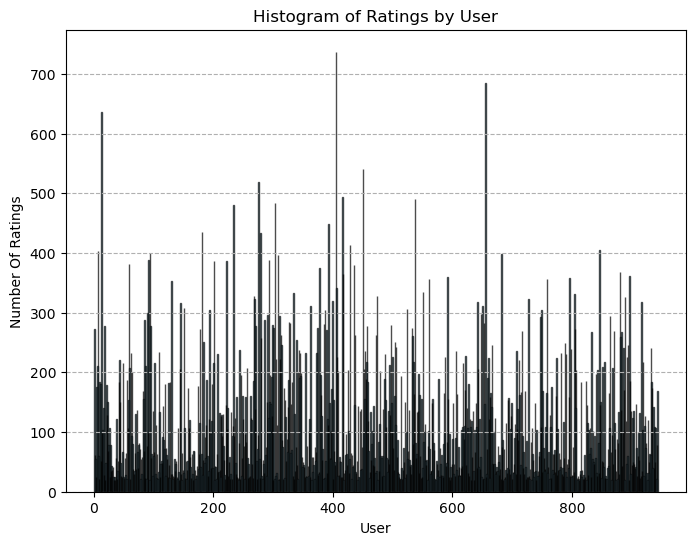

In [173]:
user = df_ratings['user_id'].value_counts()
print(f"User {user.idxmax()} has had the highest frequency of ratings with {user.max()}!")
# Plot Histogram
plt.figure(figsize=(8,6))
plt.bar(user.index, user.values, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Histogram of Ratings by User')
plt.xlabel('User')
plt.ylabel('Number Of Ratings')
plt.grid(axis='y', linestyle='--')
plt.show()

In [72]:
releasedDateCount = df_movies['release_date'].value_counts()
print(f"{releasedDateCount.idxmax()} had the most movies with {releasedDateCount.max()} releases!")


01-Jan-1995 had the most movies with 215 releases!


In [108]:
mergeRatingMovies = pd.merge(df_ratings, df_movies, on='movie_id')
mergeRatingMovies.sample(5)

,user_id,movie_id,rating,timestamp,title,release_date,video_release_date,imdb_url
8446,619,181,4,885953778,Return of the Jedi (1983),14-Mar-1997,NaN,http://us.imdb.com/M/title-exact?Return%20of%2...
29566,733,10,3,879535559,Richard III (1995),22-Jan-1996,NaN,http://us.imdb.com/M/title-exact?Richard%20III...
86403,90,1194,4,891383718,Once Were Warriors (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?Once%20Were%2...
46387,56,97,3,892677186,Dances with Wolves (1990),01-Jan-1990,NaN,http://us.imdb.com/M/title-exact?Dances%20with...
8415,296,181,5,884198772,Return of the Jedi (1983),14-Mar-1997,NaN,http://us.imdb.com/M/title-exact?Return%20of%2...


In [109]:
starwarsRatingCount = mergeRatingMovies[mergeRatingMovies['title'] == 'Star Wars (1977)'].shape[0]
print(f"Star Wars (1977) was rated {starwarsRatingCount} times!")

Star Wars (1977) was rated 583 times!


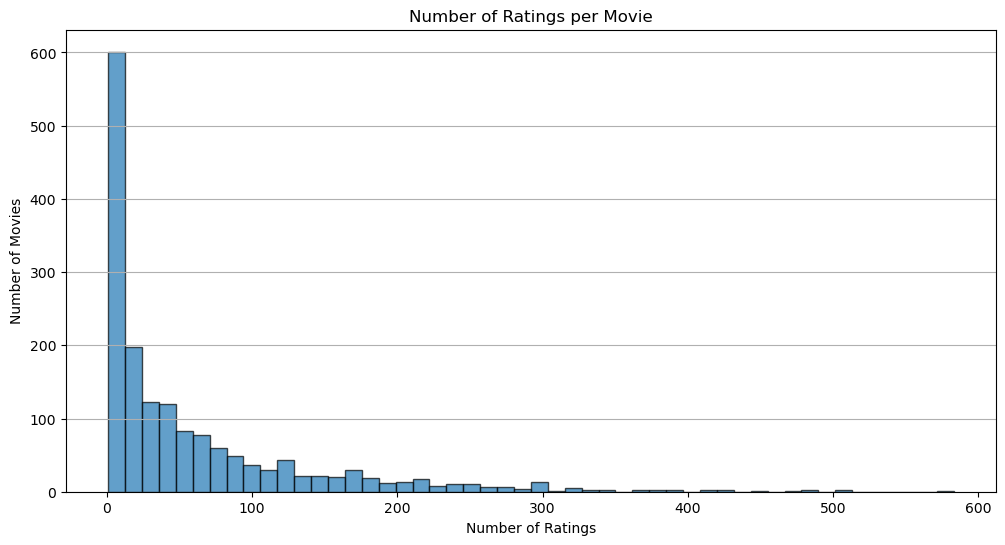

In [110]:
movieRatings = mergeRatingMovies.groupby('title').size()

# Histogram using the number of ratings per movie
plt.figure(figsize=(12, 6))
plt.hist(movieRatings, bins=50, edgecolor='black', alpha=0.7)
plt.title('Number of Ratings per Movie')
plt.xlabel('Number of Ratings')
plt.ylabel('Number of Movies')
plt.grid(axis='y')
plt.show()

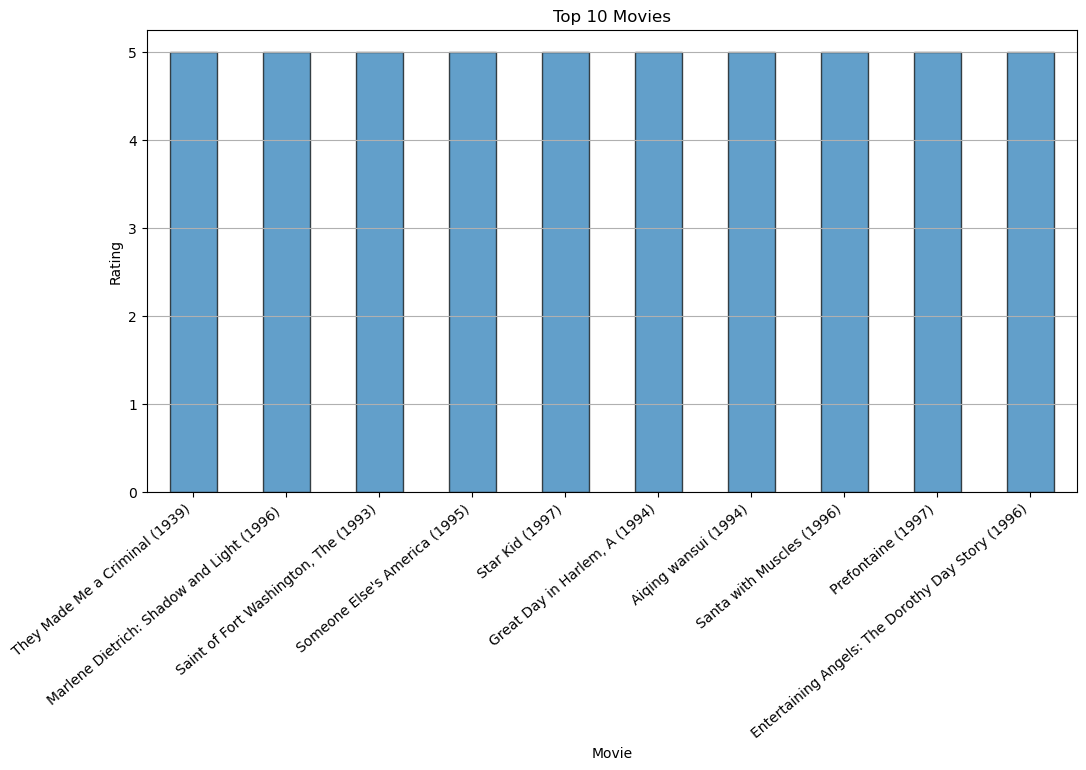

In [111]:
top10Movies = mergeRatingMovies.groupby('title')['rating'].mean().sort_values(ascending=False).head(10)

# Plot a bar chart for the top-rated movies
plt.figure(figsize=(12, 6))
topratedMovies.plot(kind='bar', edgecolor='black', alpha=0.7)
plt.title('Top 10 Movies')
plt.ylabel('Rating')
plt.xlabel('Movie')
plt.xticks(rotation=40, ha='right')
plt.grid(axis='y')
plt.show()

In [112]:
mergeUsersRatingMovies = pd.merge(mergeRatingMovies, df_users, on='user_id')

# Display a sample of rows from the combined DataFrame
mergeUsersRatingMovies.sample(5)

,user_id,movie_id,rating,timestamp,title,release_date,video_release_date,imdb_url,age,gender,occupation,zip_code
24673,116,748,2,876452186,"Saint, The (1997)",14-Mar-1997,NaN,http://us.imdb.com/M/title-exact?Saint%2C%20Th...,40,M,healthcare,97232
67747,804,62,4,879445305,Stargate (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?Stargate%20(1...,39,M,educator,61820
46236,11,365,3,891904764,Powder (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Powder%20(1995),39,F,other,30329
91180,939,934,3,880262139,"Preacher's Wife, The (1996)",13-Dec-1996,NaN,http://us.imdb.com/M/title-exact?Preacher's%20...,26,F,student,33319
18497,345,200,4,884916339,"Shining, The (1980)",01-Jan-1980,NaN,"http://us.imdb.com/M/title-exact?Shining,%20Th...",28,F,librarian,94143


In [115]:
ratingsCount = mergeUsersRatingMovies.groupby('title')['rating'].count()
ratingAverage = mergeUsersRatingMovies.groupby('title')['rating'].mean()

# Combine the count and average rating into a single DataFrame
ratings_summary = pd.DataFrame({
    'Number of Ratings': ratingsCount,
    'Average Rating': ratingAverage
})

# Display the result
ratings_summary.head(10)

,Number of Ratings,Average Rating
title,,
'Til There Was You (1997),9,2.333333
1-900 (1994),5,2.600000
101 Dalmatians (1996),109,2.908257
12 Angry Men (1957),125,4.344000
187 (1997),41,3.024390
2 Days in the Valley (1996),93,3.225806
"20,000 Leagues Under the Sea (1954)",72,3.500000
2001: A Space Odyssey (1968),259,3.969112
3 Ninjas: High Noon At Mega Mountain (1998),5,1.000000


In [116]:
# Filter movies with a minimum rating count of 100 and sort them by average rating in descending order
topMinRatingCount = ratings_summary[ratings_summary['Number of Ratings'] >= 100].sort_values(by='Average Rating', ascending=False)

# Display the top-rated movies with a minimum rating count of 100
topMinRatingCount.head(10)


,Number of Ratings,Average Rating
title,,
"Close Shave, A (1995)",112,4.491071
Schindler's List (1993),298,4.466443
"Wrong Trousers, The (1993)",118,4.466102
Casablanca (1942),243,4.456790
"Shawshank Redemption, The (1994)",283,4.445230
Rear Window (1954),209,4.387560
"Usual Suspects, The (1995)",267,4.385768
Star Wars (1977),583,4.358491
12 Angry Men (1957),125,4.344000


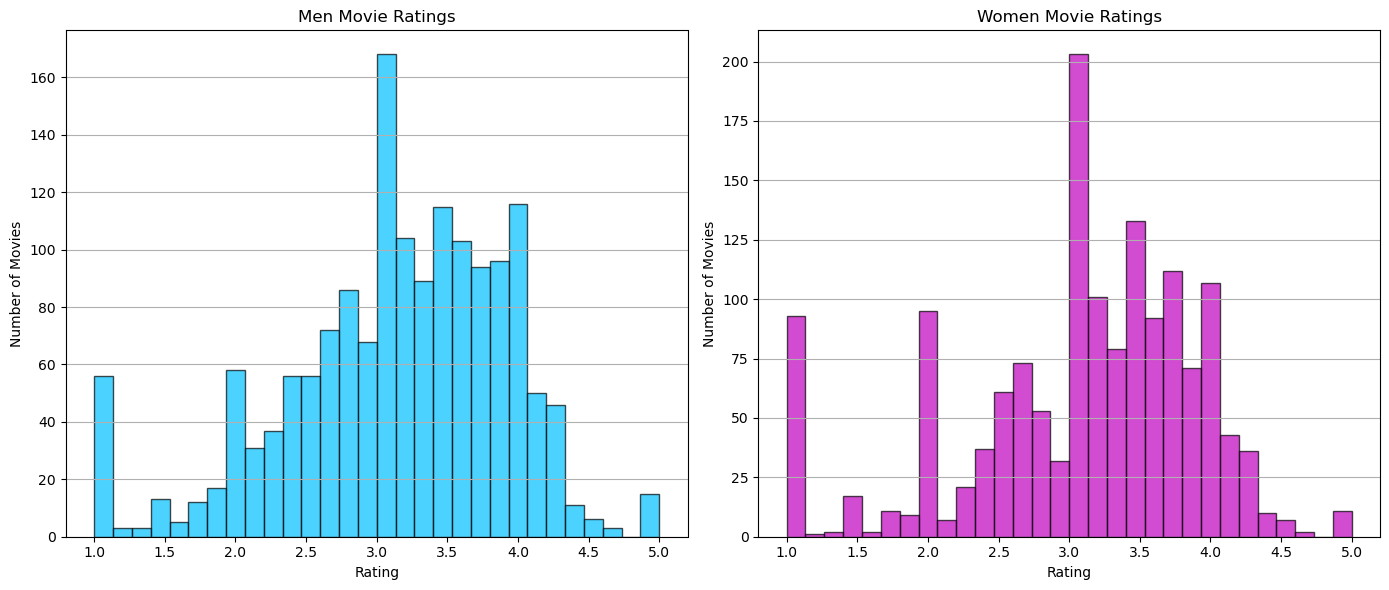

In [135]:
# Group by movie title and gender, then calculate the mean rating for each group
ratingByGender = mergeUsersRatingMovies.groupby(['title', 'gender'])['rating'].mean().unstack()

# Plot histograms for each gender
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Male histogram
ax[0].hist(ratingByGender['M'].dropna(), bins=30, edgecolor='black', alpha=0.7, color='deepskyblue')
ax[0].set_title('Men Movie Ratings')
ax[0].set_xlabel('Rating')
ax[0].set_ylabel('Number of Movies')
ax[0].grid(axis='y')

# Female histogram
ax[1].hist(ratingByGender['F'].dropna(), bins=30, edgecolor='black', alpha=0.7, color='m')
ax[1].set_title('Women Movie Ratings')
ax[1].set_xlabel('Rating')
ax[1].set_ylabel('Number of Movies')
ax[1].grid(axis='y')

plt.tight_layout()
plt.show()


In [136]:
# Count the number of people in each occupation
occupationCount = df_users['occupation'].value_counts()
print(occupationCount)


occupation
student          196
other            105
educator          95
administrator     79
engineer          67
programmer        66
librarian         51
writer            45
executive         32
scientist         31
artist            28
technician        27
marketing         26
entertainment     18
healthcare        16
retired           14
lawyer            12
salesman          12
none               9
homemaker          7
doctor             7
Name: count, dtype: int64


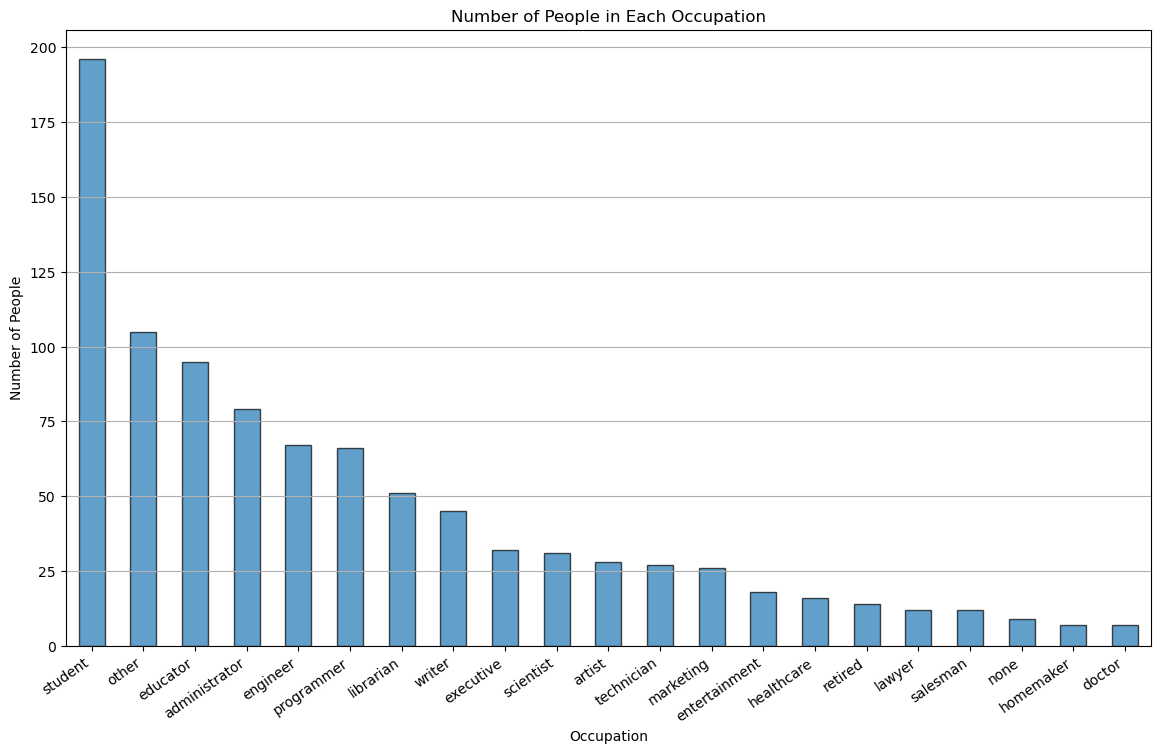

In [142]:
plt.figure(figsize=(14, 8))
occupationCount.plot(kind='bar', edgecolor='k', alpha=0.7)
plt.title('Number of People in Each Occupation')
plt.ylabel('Number of People')
plt.xlabel('Occupation')
plt.xticks(rotation=35, ha='right')
plt.grid(axis='y')
plt.show()

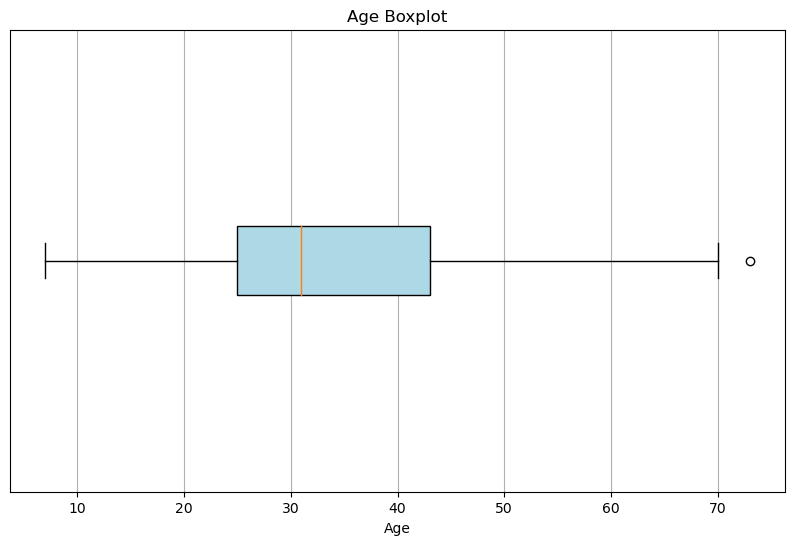

In [141]:
# Plot a boxplot for the age distribution
plt.figure(figsize=(10, 6))
plt.boxplot(df_users['age'], vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue', color='black'))
plt.title('Age Boxplot')
plt.xlabel('Age')
plt.yticks([])
plt.grid(axis='x')
plt.show()